#Resnet50

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
#Aumento de datos con ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import drive

# Montar Google Drive
drive.mount('/content/drive')

# Ruta a la carpeta del dataset
carpeta = '/content/drive/MyDrive/TEST/dataset'

Mounted at /content/drive


Found 4398 images belonging to 11 classes.
Found 1099 images belonging to 11 classes.


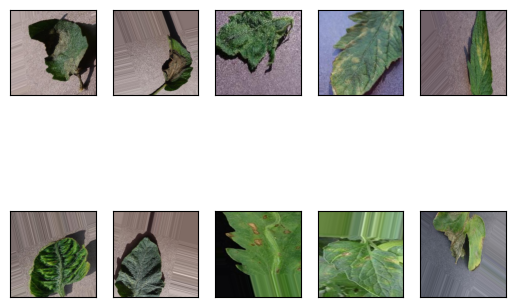

In [2]:
#Crear el dataset generador
datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 30,
    width_shift_range = 0.25,
    height_shift_range = 0.25,
    shear_range = 15,
    zoom_range = [0.5,1.5],
    validation_split = 0.2
)

#Generadores para sets de entrenamiento y pruebas
data_gen_entrenamiento = datagen.flow_from_directory(carpeta,target_size=(224,224),
                                                     batch_size=32,shuffle = True, subset='training')
data_gen_pruebas = datagen.flow_from_directory(carpeta,target_size=(224,224),
                                                       batch_size=32,shuffle = True, subset='validation')

#Imprimir 10 imagenes del generador de entrenamiento
for imagen, etiqueta in data_gen_entrenamiento:
  for i in range(10):
    plt.subplot(2,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(imagen[i])
  break
plt.show()

In [3]:
import tensorflow as tf
import tensorflow_hub as hub

url = "https://www.kaggle.com/models/tensorflow/resnet-50/frameworks/TensorFlow2/variations/feature-vector/versions/1"
resnet50 = hub.KerasLayer(url)

In [4]:
#Congelar el modelo descargado
resnet50.trainable = False


In [15]:
modelo = tf.keras.Sequential([
    resnet50,
    tf.keras.layers.Dense(units=2048, activation='relu',
                          kernel_regularizer=tf.keras.regularizers.l2(0.001)),  # L2 regularization
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=1024, activation='relu',
                          kernel_regularizer=tf.keras.regularizers.l2(0.001)),  # L2 regularization
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(11, activation='softmax')
])


In [16]:
modelo.build([None, 224, 224, 3])  # Batch input shape.

In [17]:
modelo.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 2048)              23561152  
                                                                 
 dense_7 (Dense)             (None, 2048)              4196352   
                                                                 
 batch_normalization_5 (Batc  (None, 2048)             8192      
 hNormalization)                                                 
                                                                 
 dropout_5 (Dropout)         (None, 2048)              0         
                                                                 
 dense_8 (Dense)             (None, 1024)              2098176   
                                                                 
 batch_normalization_6 (Batc  (None, 1024)             4096      
 hNormalization)                                      

In [18]:
#compilar el modelo

modelo.compile(
    optimizer = 'adam',
    loss='categorical_crossentropy',
    metrics = ['accuracy']
)

Epoch 1/15
138/138 [==============================] - 1482s 11s/step - loss: 4.4826 - accuracy: 0.6210 - val_loss: 3.8895 - val_accuracy: 0.7425
Epoch 2/15
138/138 [==============================] - 1475s 11s/step - loss: 3.7978 - accuracy: 0.7115 - val_loss: 3.2541 - val_accuracy: 0.8126
Epoch 3/15
138/138 [==============================] - 1436s 10s/step - loss: 3.3530 - accuracy: 0.7501 - val_loss: 3.0006 - val_accuracy: 0.8035
Epoch 4/15
138/138 [==============================] - 1465s 11s/step - loss: 3.0030 - accuracy: 0.7647 - val_loss: 2.6699 - val_accuracy: 0.8244
Epoch 5/15
138/138 [==============================] - 1467s 11s/step - loss: 2.7096 - accuracy: 0.7897 - val_loss: 2.3780 - val_accuracy: 0.8444
Epoch 6/15
138/138 [==============================] - 1473s 11s/step - loss: 2.4867 - accuracy: 0.7901 - val_loss: 2.2390 - val_accuracy: 0.8444
Epoch 7/15
138/138 [==============================] - 1478s 11s/step - loss: 2.3525 - accuracy: 0.7829 - val_loss: 2.0328 - val_ac

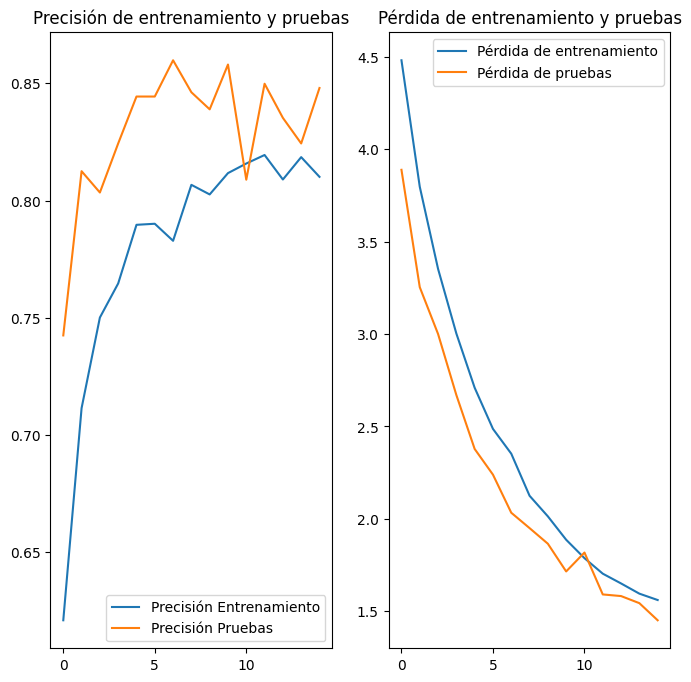

In [21]:
EPOCAS = 15

historial = modelo.fit(
    data_gen_entrenamiento,
    epochs = EPOCAS,
    batch_size=32,
    validation_data = data_gen_pruebas
)

# Gráficas de precisión
acc = historial.history['accuracy']
val_acc = historial.history['val_accuracy']

loss = historial.history['loss']
val_loss = historial.history['val_loss']

rango_epocas = range(15)

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(rango_epocas, acc, label='Precisión Entrenamiento')
plt.plot(rango_epocas, val_acc, label='Precisión Pruebas')
plt.legend(loc='lower right')
plt.title('Precisión de entrenamiento y pruebas')

plt.subplot(1,2,2)
plt.plot(rango_epocas, loss, label='Pérdida de entrenamiento')
plt.plot(rango_epocas, val_loss, label='Pérdida de pruebas')
plt.legend(loc='upper right')
plt.title('Pérdida de entrenamiento y pruebas')
plt.show()
